In [1]:
import numpy as np
import pandas as pd

# Cargar Data

In [2]:
path='../SOURCES/' 
# path_res='%sResults2.csv' %(path)
path_res='%sResults.csv' %(path)

In [3]:
data = pd.read_csv(path_res, sep=",", header=0,  dtype={'week': str,'year': str})
# data = data.head(100)
data['time'] = data['year']+"-"+data['week']
data.head(10)

,customer_tag,year,week,profile_id,mccg,turn,size,m2t0d0,m2t0d1,m2t0d2,...,m28t3d0,m28t3d1,m28t3d2,m28t3d3,m28t3d4,m28t3d5,m28t3d6,individual_cluster,collective_cluster,time
0,+++g8j9k+5A=,2016,27,0,8,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-27
1,++/oQ9Lb9dI=,2017,22,0,25,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2017-22
2,++14g8obpj0=,2016,36,0,15,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-36
3,++14g8obpj0=,2016,35,1,18,0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-35
4,++14g8obpj0=,2016,31,2,22,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-31
5,++1XMtcwMec=,2016,38,0,5,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-38
6,++3gxZFOJCM=,2016,22,0,18,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,2016-22
7,++438ugzEhg=,2017,11,0,22,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,45,2017-11
8,++5u+heOZ8o=,2016,43,0,11,2,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-43
9,++70ByX0a3Q=,2016,33,0,22,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-33


In [4]:
# Lista de Clientes
clientes = data.customer_tag.unique()
len(clientes)

227663

In [5]:
# Lista de Periodos

def listar_periodos(time_min,time_max):
    year_min = int(time_min[:4])
    year_max = int(time_max[:4])
    week_min = int(time_min[-2:])
    week_max = int(time_max[-2:])
    
    periodos = []

    if year_min == year_max:
        year = year_min
        for week in range(week_min,week_max+1):
            weeks = ""
            if week < 10:
                weeks = "0"+str(week)
            else:
                weeks = str(week)
            periodos.append(str(year)+"-"+weeks)

    else:
        for year in range(year_min,year_max+1):
            if year == year_min:
                for week in range(week_min,53):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
            elif year == year_max:   
                for week in range(1,week_max+1):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
            else:    
                for week in range(1,53):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
    
    return list(periodos)

lista_periodos = listar_periodos(min(data['time']),max(data['time']))

# Generación de la secuencia de perfiles 

Transformamos la secuencia cronológica de comportamientos en símbolos (corpus), definidos por los perfiles de comportamiento y tomando en cuentas las temporadas sin actividad etiquetandolas como "SinActividad"


In [6]:
corpus=[]
    
for index, cliente in enumerate(clientes):
    lista = []
    for index2, periodo in enumerate(lista_periodos):
        lista.append("SinActividad")
        
    corpus.append(lista)   # creamos la lsita de comportamientos en bruto

In [7]:
# cargamos la lista de comportamientos(corpus) con sus valores respectivos.

for i in range(len(data)):
    # en la comportamiendo del cliente_i (extraemos las columnas necesarias)
    fila = data.loc[i,['customer_tag','time','year','week','collective_cluster']]
   
    # en el indice del cliente i_c  y del periodo i_p 
    index_c = list(clientes).index((fila[0]))  # posision de "customer_tag" en la  lista de clientes
    index_p = lista_periodos.index(fila[1])    # posision de "time" en la  lista de periodo  
    
    if i%50000==0:
        print("porsessing: ",i)
    try:
        num = ""
        if int(fila[4]) < 10:
            num = "0" + str(int(fila[4]))
        else:
            num = str(int(fila[4]))
        
        corpus[index_c][index_p] = "cluster_"+num
    except Exception as e:
        print("Oops!  That was no valid index.  Try again...")
    


porsessing:  0
porsessing:  50000
porsessing:  100000
porsessing:  150000
porsessing:  200000
porsessing:  250000
porsessing:  300000
porsessing:  350000
porsessing:  400000
porsessing:  450000
porsessing:  500000
porsessing:  550000


In [8]:
len(corpus[0]),len(corpus)

(83, 227663)

# Sequitur para inferir reglas gramaticales

Aplicamos el algoritmo de sequitur para inferir las reglas gramaticales dado por los codigos de los comportamientos, que nos generara "reglas", definida por los simbolos que se repiten en la secuencia.


### Funciones de Apoyo

#### Otras Funciones

In [9]:
# Verifica que los elementos de una lista esten contenidos en otra lista
def elementos_en_lista(lista1, lista2):
    for i in range(len(lista1)):
        if not(lista1[i] in lista2):
            return False    
    return True

#### Algoritmo de Sequitur

In [10]:
from SequiturAlgorithm import run_sequitur

#### Descompresion de Sequitur

In [11]:
# Retorma la logintud de cada regla extendida y la regla estendida
def descomprimir_sequitur(semilla_l,nom_reglas,rs_comprimida,rs_tamaño,rs_extendida):
    num_reglas = len(nom_reglas)
    simbolos_semilla_les = [str(element) for element in list(np.unique(semilla_l))]
    simbolos_derivados = []
    
    incompleto = True
    contador = 0
    
    # 1 prueba: valores on solo 2 elementos
    for i in range(num_reglas):
        if elementos_en_lista(rs_comprimida[i],simbolos_semilla_les):
            rs_extendida[i] = rs_comprimida[i]
            rs_tamaño[i] =  len(rs_extendida[i]) # = 2
            simbolos_derivados.append(nom_reglas[i])  # cargamos la lista de reglas extendidas ya reconstruidas

    while(incompleto):
        # 2 pruebas: iterativas de 2 mas elementos
        for i in range(num_reglas):
            # si su profundidad aun no esta completada
            if rs_tamaño[i]==0:
                # si sus e estan entre los simbolos ya registrados
                if elementos_en_lista(rs_comprimida[i],(simbolos_semilla_les+simbolos_derivados)):
                    # para cada elemento de la lista
                    for e in range(len(rs_comprimida[i])):
                        if rs_comprimida[i][e] in simbolos_semilla_les:
                            rs_extendida[i].append(rs_comprimida[i][e])
                        if rs_comprimida[i][e] in simbolos_derivados:
                            indice = nom_reglas.index(rs_comprimida[i][e])
                            rs_extendida[i] =  rs_extendida[i] + rs_extendida[indice]
                    rs_tamaño[i] =  len(rs_extendida[i])  # actualizamos valor de prifundidad
                    simbolos_derivados.append(nom_reglas[i])  # cargamos la lista de reglas extendida
        
        # 3 Comprobamos que todas las reglas esten llenas
        if not(0 in rs_tamaño):
            incompleto = False

    return rs_tamaño,rs_extendida

### Funcion Principal

In [12]:
def generador_de_reglas(lista_original):
    # Ejecutamos Sequitur
    resp_sequitur = run_sequitur(lista_original)
    reglas = resp_sequitur[0]  # Extraemos solo la lista de reglas (Ver Alg. Sequitur)
    incidencia = resp_sequitur[1]
    
    # Creamos listas para cada regla: nombres,exp comprimidad, numero_incidencias, longitud, exp extendida
    r_nombre = []
    r_comprimida = []
    r_incidencias = []
    r_longitud = []
    r_extendida = []

    for i in range(len(reglas)):
        nombre = 'R'+str(i) 
        profundidad = 0
        # print(nombre,' -> ',reglas[nombre],"  =  ",profundidad)
        r_nombre.append(nombre)
        r_comprimida.append(reglas[nombre])
        r_incidencias.append(int(incidencia[nombre]))  # lista de incidencias
        r_longitud.append(profundidad)    # Inicialmente cargamos con "0"
        r_extendida.append([])               # Inicialmente cargamos con listas vacias

    # Descomprimimos reglas
    resultado = descomprimir_sequitur(lista_original,r_nombre,r_comprimida,r_longitud,r_extendida)

    if len(lista_original)!=len(resultado[1][0]):
        return "Error"

    r_longitud = resultado[0]
    r_extendida = resultado[1]

    return r_nombre, r_comprimida, r_incidencias, r_longitud, r_extendida
    #return r_incidencias,incidencia
    

#### Ejemplo

In [61]:
ejemplo = ["a","a","b","c","a","a","c","b","c"]
generador_de_reglas(ejemplo)

(['R0', 'R1', 'R2'],
 [['R1', 'R2', 'R1', 'c', 'R2'], ['a', 'a'], ['b', 'c']],
 [0, 2, 2],
 [9, 2, 2],
 [['a', 'a', 'b', 'c', 'a', 'a', 'c', 'b', 'c'], ['a', 'a'], ['b', 'c']])

# Validacion de Reglas de Cada Cliente

Aplicamos el algoritmo de sequitur para inferir las reglas gramaticales dado por los codigos de los comportamientos, que nos generara "reglas", definida por los simbolos que se repiten en la secuencia.


### Funciones de Apoyo

#### Generador de sequencias aleatorias

In [62]:
#ejemplo = corpus[1]

In [63]:
from random import choice

def random_sequence(seq_original):
    # Fixing random state for reproducibility
    #np.random.seed(19680801)
    
    tags = list(np.unique(seq_original))                           # Etiquetas de unicas
    long = len(seq_original)                                       # Numero de perfiles unicos del cliente
    elementos = {tag:0 for tag in tags}                       # Generamos lista aleatoria
    for i in range(len(seq_original)):    
        simbolo = ejemplo[i]
        elementos[simbolo] += 1

    sequences = []

    for i in range(long):
        simbolo_aleatorio = choice(tags) # Generamos simbolo aleatorio
        elementos[simbolo_aleatorio] -= 1
        if elementos[simbolo_aleatorio] == 0:
            tags.remove(simbolo_aleatorio)
        sequences.append(simbolo_aleatorio)

    return sequences

In [64]:
random_sequence(ejemplo)

['c', 'a', 'a', 'b', 'a', 'c', 'b', 'c', 'a']

In [65]:
#     def random_sequence(seq_original):
#         # Fixing random state for reproducibility
#         #np.random.seed(19680801)
#         tags = list(np.unique(seq_original))                           # Etiquetas de unicas
#         length = len(seq_original)                                     # Numero de perfiles unicos del cliente
#         sequences = list(np.random.choice(tags, length, replace=True)) # Generamos lista aleatoria
#         
#         elementos = {tag:0 for tag in tags} 
#         for i in range(len(ejemplo)):    
#             simbolo = ejemplo[i]
#             elementos[simbolo] += 1
#         elementos 
#         
#         return sequences

#### Informacion de la Regla Original

In [66]:
# Datos de la lista Original

reglas_originales = generador_de_reglas(ejemplo)

#-------------------------------------------#
# POSICION      Reglas_originales[POSICION] #
#-------------------------------------------#
#    0              Nombres                 #
#    1              Comprimidas             #
#    2              Incidencias             #
#    3              Longitud                #
#    4              Extendido               #
#-------------------------------------------#
 

reglas_originales_nombre = reglas_originales[0]
reglas_originales_comprimidas = reglas_originales[1]
reglas_originales_incidencias = reglas_originales[2]
reglas_originales_longitud = reglas_originales[3]
reglas_originales_extendido = reglas_originales[4]

#### Generador de Muestra para validar Reglas

In [87]:
# lista original,numeros
def crear_muestra_reglas(lista_original,num = 100):
    
    # Datos de la lista Original
    reglas_originales = generador_de_reglas(lista_original)
    reglas_originales_nombre = reglas_originales[0]
    reglas_originales_comprimidas = reglas_originales[1]
    reglas_originales_incidencias = reglas_originales[2]
    reglas_originales_longitud = reglas_originales[3]
    reglas_originales_extendido = reglas_originales[4]
    
    # Creamos dataframe (nombre_regla, numero_incidencias_en_cada_iteracion, numero_de_iteracion)
    matriz = [[], [], []]


    for i in range(num):                              # para *num* repeticiones
        
        sequencia_aleatoria = random_sequence(lista_original)                # Creamos la lista Aleatoria
        
        # Datos de la lista Aleatoria
        reglas_aleatorias = generador_de_reglas(sequencia_aleatoria)
        reglas_aleatorias_extendidas = reglas_aleatorias[4]  
        reglas_aleatorias_incidencias = reglas_aleatorias[2] 
        
        # Para cada regla de las regla_originales
        for j in range(len(reglas_originales_nombre)):
            
            # Para cada REGLA de las "reglas_originales"
            
            # Buscamos si "REGLA original" apareces entre las "reglas_aleatorias_extendidas" y extraemos su numero de incidencias
            numero_de_incidencia = 0
            for k in range(len(reglas_aleatorias_extendidas)):
                # Si la REGLA (reglas_aleatorias_extendidas) se encuentra en lista de "reglas_aleatorias_extendidas"
                if reglas_originales_extendido[j] == reglas_aleatorias_extendidas[k]:
                    #print(True)
                    numero_de_incidencia = int(reglas_aleatorias_incidencias[k])
        
            # Cargamos fila de la lista Matriz
            matriz[0].append(reglas_originales_nombre[j])   # Guardamos nombre en la lista                
            matriz[1].append(numero_de_incidencia)          # Guardamos numero de iteracion
            matriz[2].append(i)                             # Guardamos numero de iteracion
    
    return matriz
            
            

## Grafico para cada Cliente

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

    Para cada cliente
        
        Obtener lista de Reglas y DAtos
        Obtener muestra a validar (Muestra)
        
        Para cada Regla de la Muestra
            imprimir tabla agrupada por numero de incidencias
            plotear

Cliente:  0
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


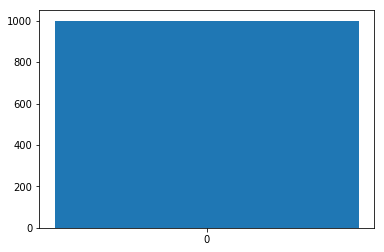

Regla:  R1
             Nombre  Iteracion
Incidencias                   
2               230        230
3               759        759
4                11         11


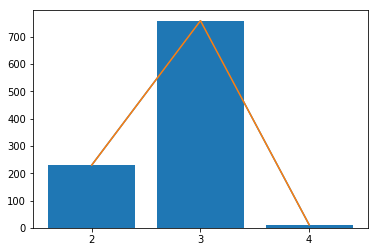

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               923        923
2                62         62
4                15         15


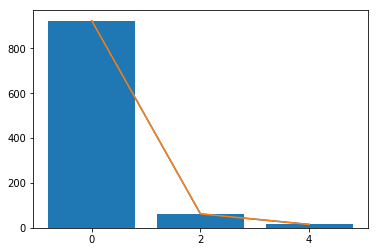

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               985        985
3                15         15


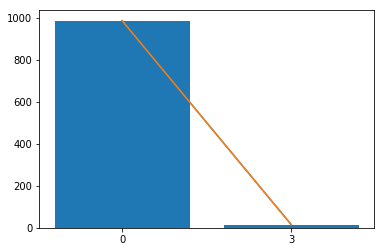

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0               985        985
2                15         15


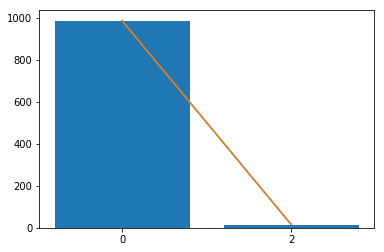

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0               974        974
2                26         26


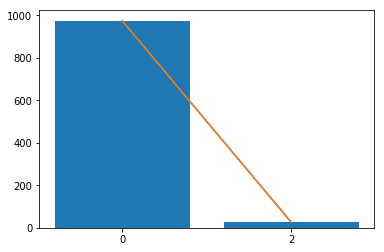

Cliente:  1
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


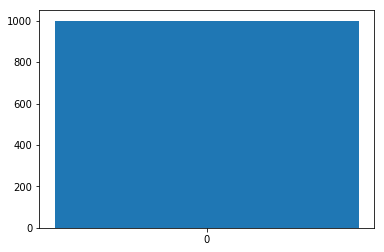

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                22         22
2               107        107
3               871        871


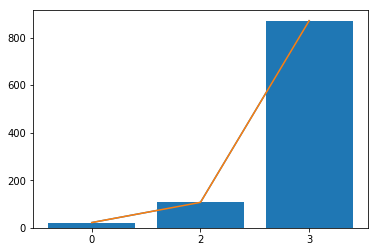

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               997        997
3                 3          3


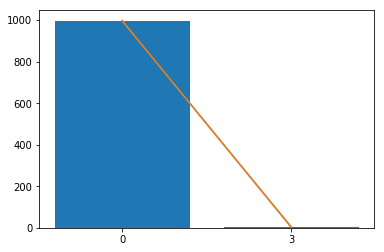

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0                22         22
2               884        884
3                94         94


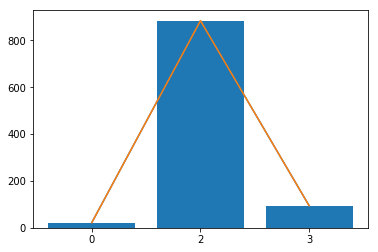

Regla:  R4
             Nombre  Iteracion
Incidencias                   
2               251        251
3               736        736
4                13         13


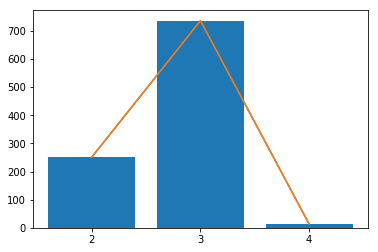

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                19         19
2               874        874
3                67         67
4                40         40


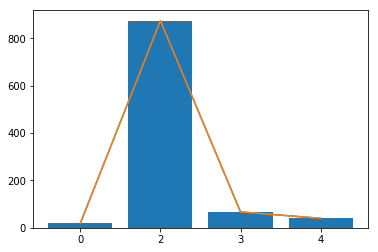

Cliente:  2
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


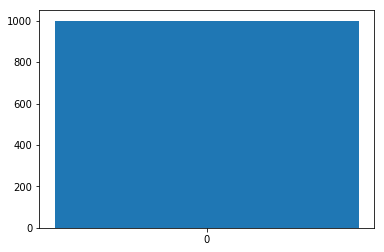

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                61         61
2               190        190
3               745        745
4                 4          4


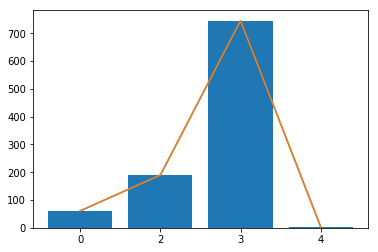

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               776        776
2               181        181
3                43         43


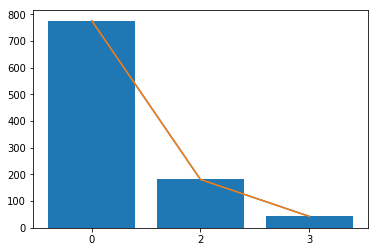

Regla:  R3
             Nombre  Iteracion
Incidencias                   
2               317        317
3               508        508
4               147        147
5                28         28


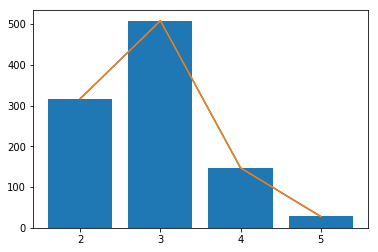

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                68         68
2               932        932


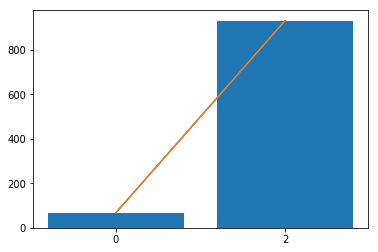

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                53         53
2               319        319
3               591        591
4                36         36
5                 1          1


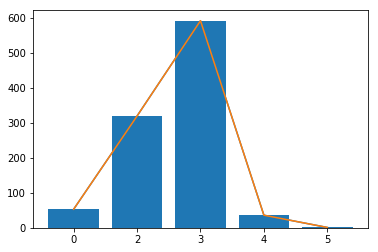

Regla:  R6
             Nombre  Iteracion
Incidencias                   
0                61         61
2               808        808
3               131        131


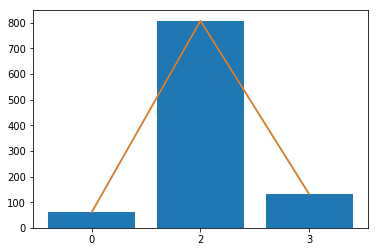

Cliente:  3
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


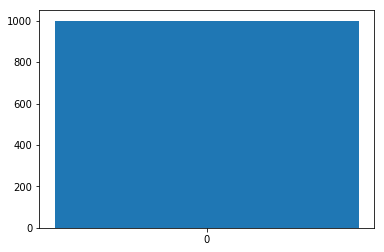

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                14         14
2               103        103
3               883        883


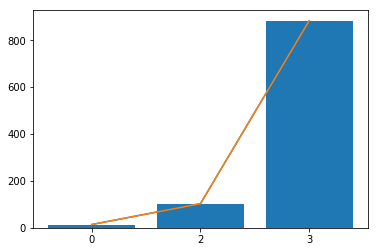

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0                14         14
2               986        986


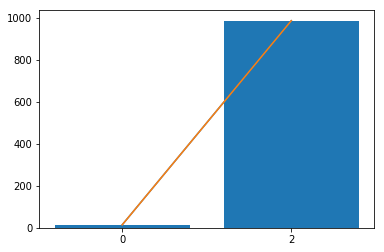

Regla:  R3
             Nombre  Iteracion
Incidencias                   
2               259        259
3               731        731
4                10         10


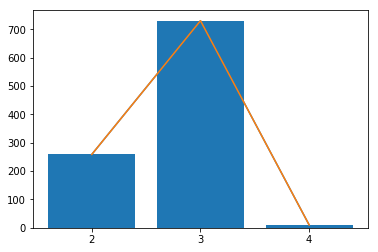

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                14         14
2               893        893
3                90         90
4                 3          3


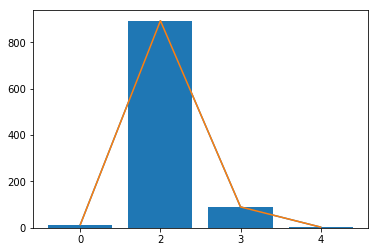

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                13         13
2               887        887
3                53         53
4                47         47


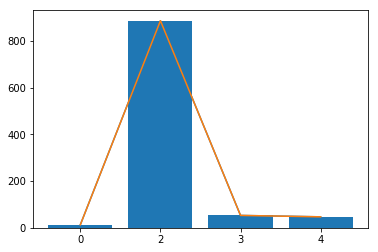

Cliente:  4
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


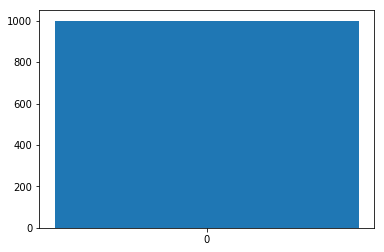

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                27         27
2               973        973


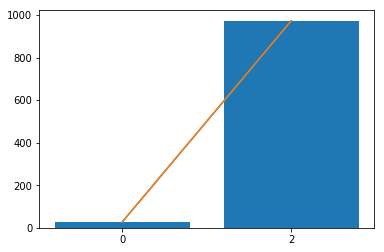

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0                27         27
2               103        103
3               870        870


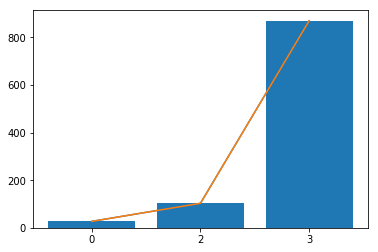

Regla:  R3
             Nombre  Iteracion
Incidencias                   
2               245        245
3               745        745
4                10         10


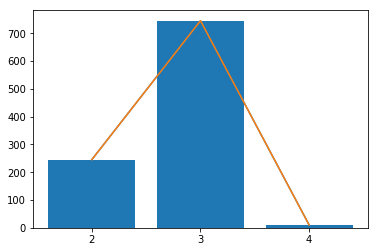

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                27         27
2               880        880
3                92         92
4                 1          1


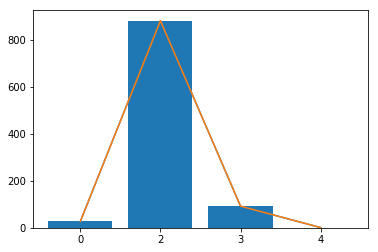

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                26         26
2               872        872
3                53         53
4                49         49


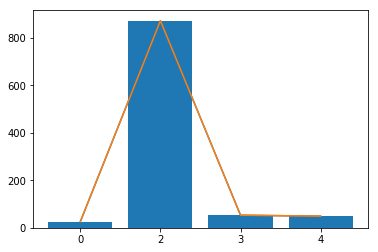

Cliente:  5
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


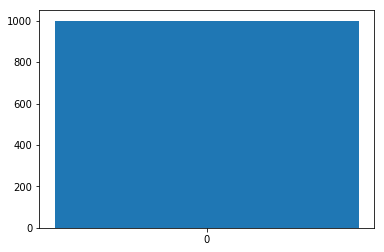

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                25         25
2                96         96
3               879        879


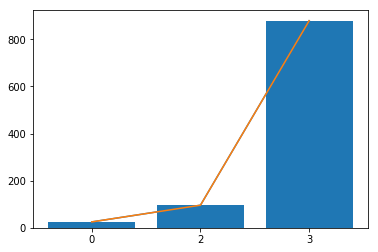

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0              1000       1000


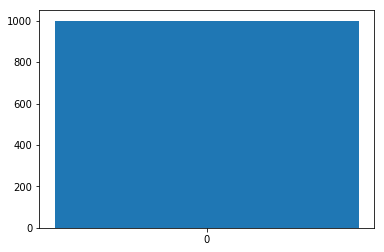

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0              1000       1000


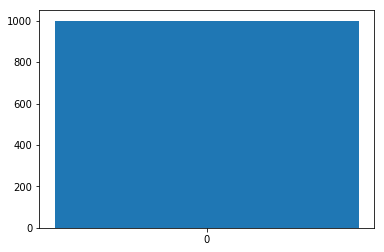

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                23         23
2               882        882
3                60         60
4                35         35


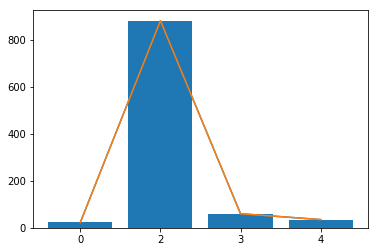

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                25         25
2               886        886
3                88         88
4                 1          1


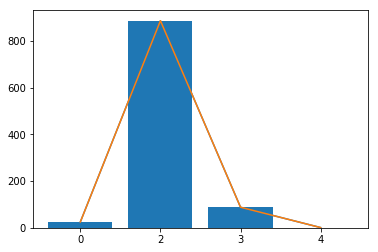

Regla:  R6
             Nombre  Iteracion
Incidencias                   
2               244        244
3               748        748
4                 8          8


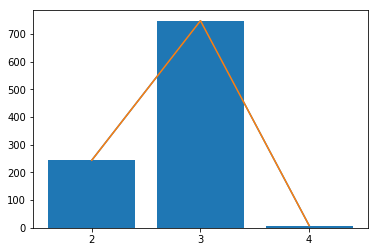

Cliente:  6
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


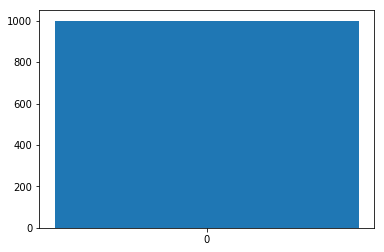

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                19         19
2               883        883
3                93         93
4                 5          5


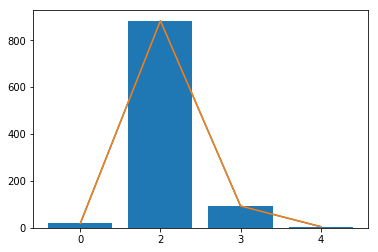

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               998        998
3                 2          2


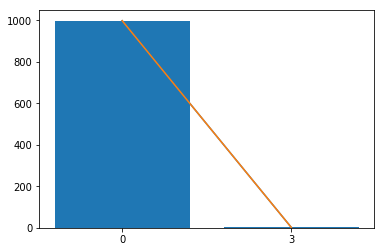

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               998        998
3                 2          2


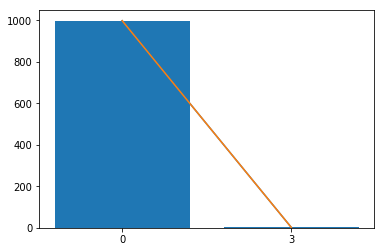

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                17         17
2               884        884
3                61         61
4                38         38


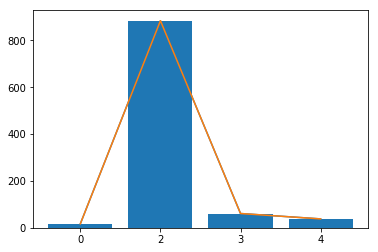

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0               998        998
3                 2          2


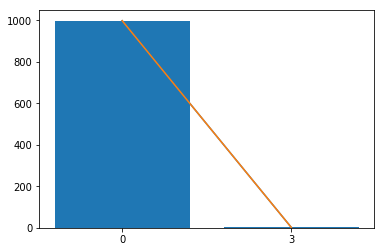

Regla:  R6
             Nombre  Iteracion
Incidencias                   
2               248        248
3               746        746
4                 6          6


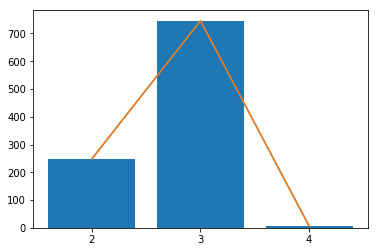

Cliente:  7
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


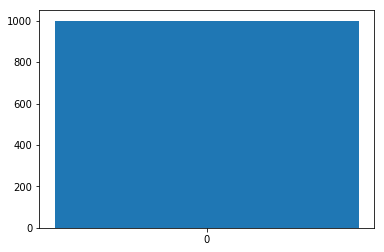

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                44         44
2               382        382
3               523        523
4                50         50
5                 1          1


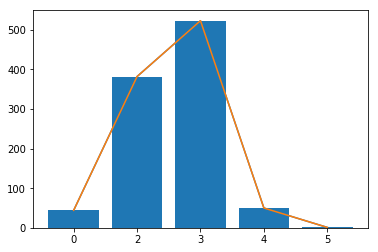

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               937        937
2                16         16
3                21         21
4                25         25
5                 1          1


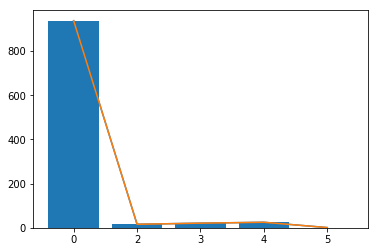

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               913        913
2                84         84
3                 3          3


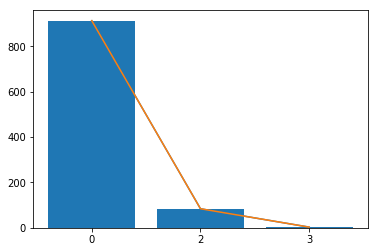

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                44         44
2               382        382
3               523        523
4                50         50
5                 1          1


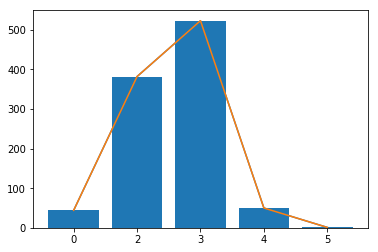

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0               980        980
2                20         20


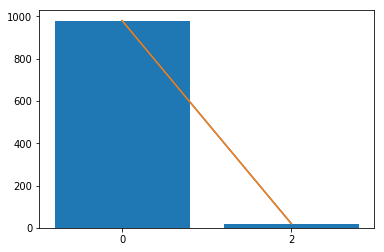

Regla:  R6
             Nombre  Iteracion
Incidencias                   
0              1000       1000


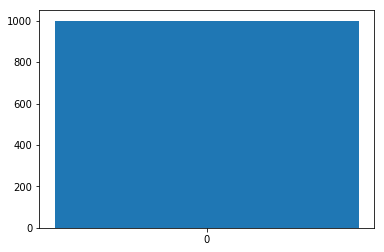

Regla:  R7
             Nombre  Iteracion
Incidencias                   
0                52         52
2               158        158
3               788        788
4                 2          2


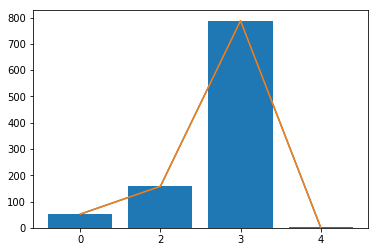

Regla:  R8
             Nombre  Iteracion
Incidencias                   
2               379        379
3               410        410
4               178        178
5                31         31
6                 2          2


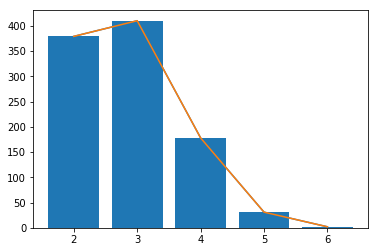

Cliente:  8
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


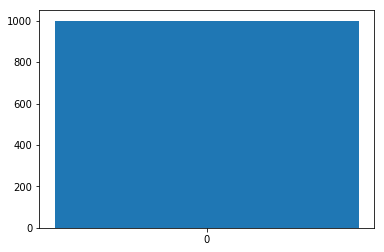

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                22         22
2               865        865
3               113        113


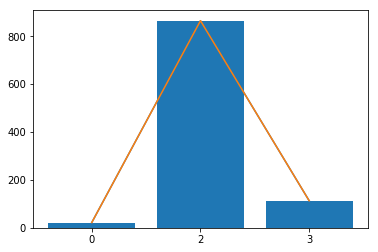

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0                22         22
2               859        859
3                81         81
4                38         38


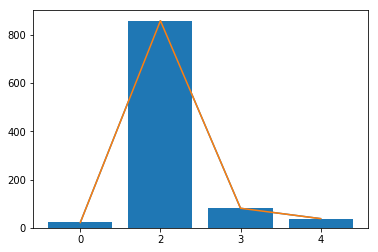

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               897        897
2                81         81
4                22         22


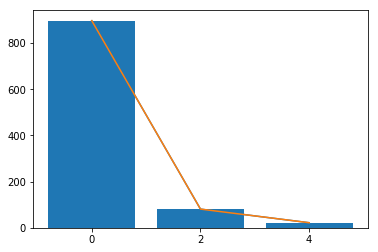

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0               978        978
3                22         22


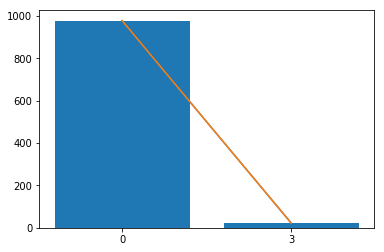

Regla:  R5
             Nombre  Iteracion
Incidencias                   
2               229        229
3               765        765
4                 6          6


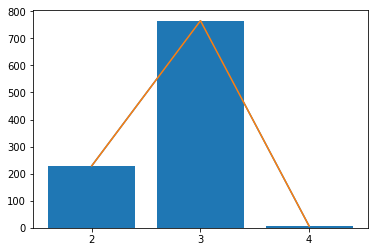

Regla:  R6
             Nombre  Iteracion
Incidencias                   
0               978        978
2                22         22


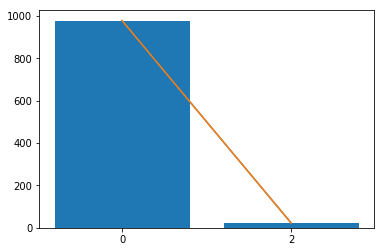

Regla:  R7
             Nombre  Iteracion
Incidencias                   
0               972        972
2                28         28


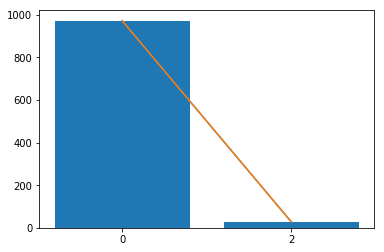

Cliente:  9
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


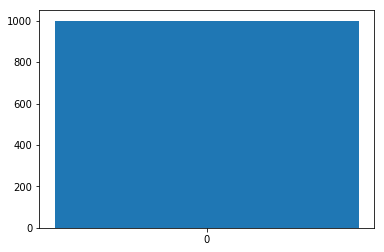

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                42         42
2               574        574
3               384        384


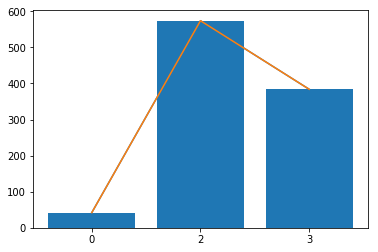

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0                42         42
2               402        402
3               554        554
4                 2          2


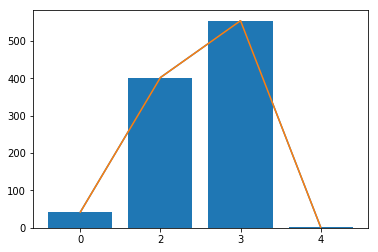

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               996        996
2                 1          1
3                 3          3


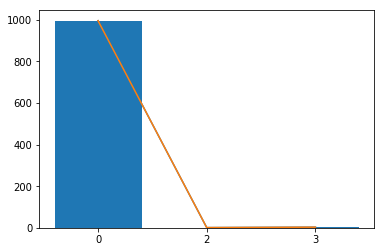

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0               997        997
2                 1          1
3                 2          2


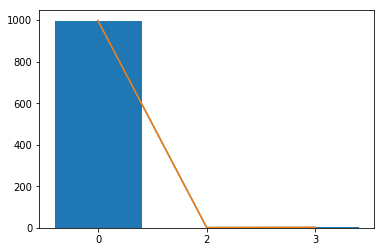

Regla:  R5
             Nombre  Iteracion
Incidencias                   
0                35         35
2               484        484
3               453        453
4                28         28


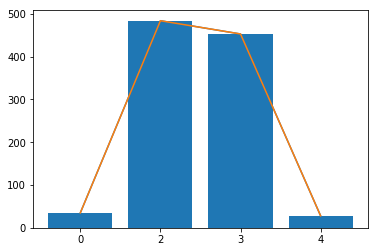

Regla:  R6
             Nombre  Iteracion
Incidencias                   
2               484        484
3               368        368
4               145        145
5                 3          3


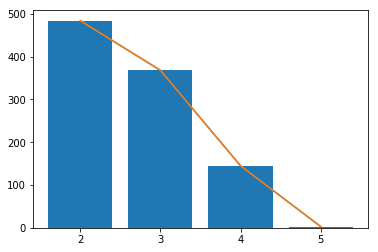

Cliente:  10
Regla:  R0
             Nombre  Iteracion
Incidencias                   
0              1000       1000


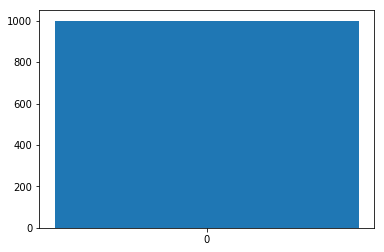

Regla:  R1
             Nombre  Iteracion
Incidencias                   
0                17         17
2               897        897
3                84         84
4                 2          2


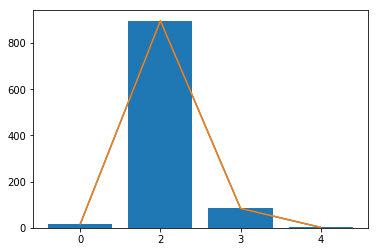

Regla:  R2
             Nombre  Iteracion
Incidencias                   
0               985        985
2                15         15


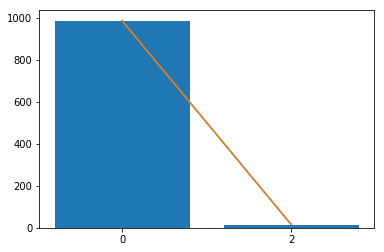

Regla:  R3
             Nombre  Iteracion
Incidencias                   
0               985        985
3                15         15


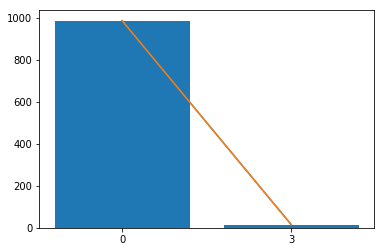

Regla:  R4
             Nombre  Iteracion
Incidencias                   
0                15         15
2               890        890
3                56         56
4                39         39


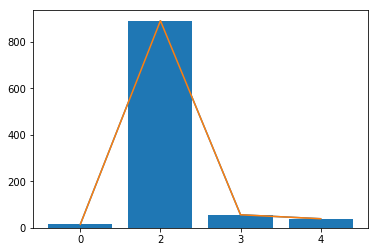

Regla:  R5
             Nombre  Iteracion
Incidencias                   
2               262        262
3               727        727
4                11         11


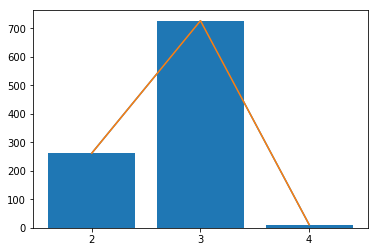

In [147]:
for i in range(len(clientes)):
    
    ejemplo = corpus[i]
    # Datos de la regla
    reglas_originales = generador_de_reglas(ejemplo)
    reglas_originales_nombre = reglas_originales[0]
    reglas_originales_comprimidas = reglas_originales[1]
    reglas_originales_incidencias = reglas_originales[2]
    reglas_originales_longitud = reglas_originales[3]
    reglas_originales_extendido = reglas_originales[4]


    print("Cliente: ",i)
    # Creamos dataframe (nombre_regla, numero_incidencias_en_cada_iteracion, numero_de_iteracion)
    m = crear_muestra_reglas(ejemplo,1000)
    muestra = pd.DataFrame(data= {'Nombre': m[0], 'Incidencias': m[1], 'Iteracion': m[2]})
    #print(muestra.head(10))
    
    # Para cada Regla
    for j in reglas_originales_nombre:
        print("Regla: ",j)
        
        # Muestra de solo un aregla y distribucion de una regla
        submuestra = muestra.loc[muestra['Nombre'] == j]
        ditribucion = submuestra.groupby(['Incidencias']).count()      # Us por incidencias
        print(ditribucion)
        
        xx = ditribucion["Nombre"].tolist()
        yy = ditribucion["Iteracion"].tolist()
        indices = [str(i) for i in list(ditribucion.index)]

        plt.bar(indices,yy)
        plt.plot(indices,ditribucion)
        plt.show()
    
    if i == 10:
        break;

In [25]:
len(clientes)

227663

In [26]:
len(corpus)

227663

In [145]:
# Reglas validas
# Cliente  Regla ocurrencias
reglas_validas = [[], [], []]

for i in range(len(clientes)):
    # Extraer Reglas validad  == funcion get rules
    # para cada regla
    #    
    
        reglas_validas[0].append(clientes[i])
        reglas_validas[1].append(i)
        reglas_validas[2].append(i*i)

In [146]:
reglas_validas

pd.DataFrame(data= {'Cliente':reglas_validas[0], 'Regla': reglas_validas[1], 'Incidencias': reglas_validas[2]})

,Cliente,Regla,Incidencias
0,+++g8j9k+5A=,0,0
1,++/oQ9Lb9dI=,1,1
2,++14g8obpj0=,2,4
3,++1XMtcwMec=,3,9
4,++3gxZFOJCM=,4,16
5,++438ugzEhg=,5,25
6,++5u+heOZ8o=,6,36
7,++70ByX0a3Q=,7,49
8,++7i5fi6kBU=,8,64
9,++834mPfd7g=,9,81
